In [1]:
%matplotlib inline
# %matplotlib notebook # Does not work 
import pickle
import numpy as np
from matplotlib import pyplot as plt


In [2]:
dataset = 'bioasq'
workdir = './' + dataset + '_dir/'

In [3]:
# res_file = './pruebas/bioasq_hpo_results_bohb.pickle'
res_file = './bioasq_dir/bioasq_hpo_results_bohb.pickle'

results = pickle.load(open(res_file, "rb"))

In [4]:
results

{'hpo_config': Namespace(dataset='bioasq', hpo_method='bohb', max_budget=100, min_budget=30, n_iterations=100, n_workers=1),
 'hpo_results': <hpbandster.core.result.Result at 0x7f275abd1ba8>}

In [5]:
hpo_res = results['hpo_results']

In [6]:
hpo_res.get_incumbent_id()

(36, 0, 0)

In [7]:
all_runs = hpo_res.get_all_runs()

In [8]:
# all_runs

In [9]:
this = max(all_runs, key=lambda x: x.info['s']['metric'])

In [10]:
this.time_stamps['finished']

5729.528720378876

In [11]:
def plot_best_n_evals(runs, window):

    loss_data = []
    n_data = []
    t_data = []
    n = 0
    while( n < len(runs) ):
#         print(runs[0:n])
#         print(runs[:n-1])
        n += window
        best_config_at_n = min(runs[0:n], key=lambda x: x.loss)
      
        loss_data.append(best_config_at_n.loss) 
        if n > len(runs):
            n_data.append(len(runs))
        else:
            n_data.append(n)
            
        t_data.append(best_config_at_n.time_stamps['submitted'])
#         t_data.append(best_config_at_n.time_stamps['finished'])
        
    return { 
            'loss_data': loss_data,
            'n_data': n_data,
            't_data': t_data
            }

    

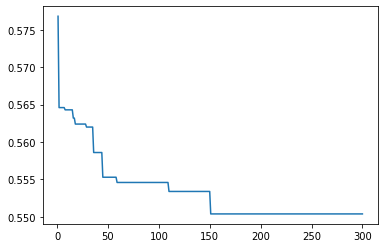

In [21]:
plot_data = plot_best_n_evals(all_runs, 1)

    #Plotting to our canvas

# plt.scatter(plot_data['n_data'],plot_data['loss_data'])
plt.plot(plot_data['n_data'],plot_data['loss_data'])
# plt.scatter(plot_data['t_data'],plot_data['loss_data'])

#Showing what we plotted

plt.show()

In [13]:
# plot_data['t_data']

In [14]:
len(plot_data['loss_data'])

300

In [15]:
# plot_data['n_data']